# Integrantes


*   Francisco Beltrami
*   Gonzalo Madariaga
*   Manuel Rojas



## 1) Integrar los 2 dataset en un solo Hoteles = H1+H2

In [76]:
import pandas as pd
import numpy as np

#df1 = pd.read_csv('/content/H1.csv')
#df2 = pd.read_csv('/content/H2.csv')

df1 = pd.read_csv('https://raw.githubusercontent.com/manuel-rojas-reyes/data/main/H1.csv', delimiter=' *, *',engine='python')
df2 = pd.read_csv('https://raw.githubusercontent.com/manuel-rojas-reyes/data/main/H2.csv', delimiter=' *, *',engine='python')

frames = [df1, df2]
df3 = pd.concat(frames, axis=0)
df3 = df3.reset_index(drop=True)
df3
#print(df3)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## 2) Desarrollar la limpieza y transformación del dataset hoteles integrado

Se cuenta la cantidad de nulos y su ubicación respectiva.

In [77]:
null_columns = df3.columns[df3.isnull().any()]
print(df3[null_columns].isnull().sum())
print(df3[df3.isnull().any(axis=1)][null_columns])

Children         4
Country        488
Agent        16340
Company     112593
dtype: int64
        Children Country  Agent  Company
0            0.0     PRT    NaN      NaN
1            0.0     PRT    NaN      NaN
2            0.0     GBR    NaN      NaN
3            0.0     GBR  304.0      NaN
4            0.0     GBR  240.0      NaN
...          ...     ...    ...      ...
119385       0.0     BEL  394.0      NaN
119386       0.0     FRA    9.0      NaN
119387       0.0     DEU    9.0      NaN
119388       0.0     GBR   89.0      NaN
119389       0.0     DEU    9.0      NaN

[119173 rows x 4 columns]


A los 4 datos NaN de la columna children, se le asigna un valor con el dato que más se repite.

In [78]:

df3['Children'] = df3['Children'].fillna(df3['Children'].mode().iloc[0])
df3

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Rellena los valores nulos de Agent con el valor más repetido de Agent

In [79]:
df3['Agent'] = df3['Agent'].fillna(df3['Agent'].mode().iloc[0])
df3


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


A los valores nulos de Country, se les asigna un valor "DSC" que sigfinica "Desconocido".

In [80]:

df3['Country'] = df3['Country'].fillna('DSC')
df3


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Se elimina la columna "Company".

In [81]:
#aqui codigo 3
df3 = df3.drop(['Company'], axis = 1)
df3


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [82]:
df3.index = np.arange(1,len(df3)+1)
df3 = df3.drop_duplicates(subset=None, 
                          keep='first', 
                          inplace=False, 
                          ignore_index=False)
df3

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
1,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
3,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
5,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119386,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119387,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119388,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119389,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


Se crea un nuevo archivo con los cambios realizados


In [83]:
df3.to_csv('Hoteles_cambiado.csv')

## 3) Aplicar técnicas de selección de características

Importamos los paquetes necesarios

In [84]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
dfc = pd.read_csv('/content/Hoteles_cambiado.csv')


Se utiliza el algoritmo univariante que aplica el metodo de selección por filtrado. Para ello, se seleccionan 2 columnas objetivos:



In [85]:
adult_col = dfc['Adults']
children_col = dfc['Children']


Convertimos variables categóricas a numéricas. Para ello, se utiliza get_dummies y además, se separó la columna "ReservationStatusDate" que representa una fecha en 3 columnas (año, mes, día). 

In [86]:
#dc2 = pd.get_dummies(dfc,columns=['ArrivalDateMonth','Meal','Country','MarketSegment','DistributionChannel','DepositType','CustomerType','ReservationStatus','ReservedRoomType',	'AssignedRoomType'	], drop_first = True)
separar_fecha= dfc['ReservationStatusDate'].str.split("-",expand=True)
separar_fecha.columns=['year','month','day']

df_fecha_separada = pd.concat([dfc,separar_fecha],axis=1)
df_final = df_fecha_separada.drop(['ReservationStatusDate'],axis=1)
df_final_dummies = pd.get_dummies(df_final,columns=['ArrivalDateMonth','Meal','Country','MarketSegment','DistributionChannel','DepositType','CustomerType','ReservationStatus','ReservedRoomType',	'AssignedRoomType'	], drop_first = True)


Se aplica algoritmo univariante de prueba F que consiste en que al objeto SelectKBest en sus paramétros se le envía la prueba F y el número de atributos a seleccionar. Luego, el algoritmo va a aplicar la prueba a todos los atributos y seleccionará a los con mejor resultado.

In [87]:
k = 5 #numero de columnas a seleccionar
entrenar = df_final_dummies.drop(['Adults','Children'],axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif,k=k).fit(entrenar,adult_col)
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos



['ADR',
 'MarketSegment_Corporate',
 'ReservedRoomType_B',
 'ReservedRoomType_D',
 'AssignedRoomType_K']

Ahora, se aplica el algoritmo univariante pero esta vez con chi cuadrado.

In [88]:
df_final_dummies

,Unnamed: 0,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,Agent,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,year,month,day,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,ArrivalDateMonth_November,ArrivalDateMonth_October,ArrivalDateMonth_September,Meal_FB,Meal_HB,Meal_SC,Meal_Undefined,Country_AGO,Country_AIA,...,Country_ZMB,Country_ZWE,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,MarketSegment_Undefined,DistributionChannel_Direct,DistributionChannel_GDS,DistributionChannel_TA/TO,DistributionChannel_Undefined,DepositType_Non Refund,DepositType_Refundable,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,ReservationStatus_Check-Out,ReservationStatus_No-Show,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_H,ReservedRoomType_L,ReservedRoomType_P,AssignedRoomType_B,AssignedRoomType_C,AssignedRoomType_D,AssignedRoomType_E,AssignedRoomType_F,AssignedRoomType_G,AssignedRoomType_H,AssignedRoomType_I,AssignedRoomType_K,AssignedRoomType_L,AssignedRoomType_P
0,1,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,9.0,0,0.00,0,0,2015,07,01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,9.0,0,0.00,0,0,2015,07,01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,9.0,0,75.00,0,0,2015,07,02,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0,2015,07,02,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1,2015,07,03,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87383,119386,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,96.14,0,0,2017,09,06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87384,119387,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0,225.43,0,2,2017,09,07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
87385,119388,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0,157.71,0,4,2017,09,07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
87386,119389,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0,104.40,0,0,2017,09,07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4)  Aplicar técnicas de reducción de dimensiones

Estandarizamos variables comunes dentro de los hoteles, en este "Adults", "Children", "Babies", y "ADR". Estas varibales se enfocan sobre una variable clave, en este caso "LeadTime"

In [89]:
# pca
from sklearn.preprocessing import StandardScaler

variables = ['Adults', 'Children', 'Babies', 'ADR']
x = df_final_dummies.loc[:, variables].values
y = df_final_dummies.loc[:,['LeadTime']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

Posterior a esto ordenamos en base a PCA e imprimimos

In [90]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-1.434165,0.058866,0.367849,-1.296778
1,-1.434165,0.058866,0.367849,-1.296778
2,-1.191883,-0.104527,-0.912651,0.340713
3,-1.191883,-0.104527,-0.912651,0.340713
4,-0.196157,-0.040931,0.351107,-0.019883


Por ultimo asignamos los nombres de las columnas en base a PCA y nuestra variable objetivo (LeadTime)

In [91]:
x_pca['LeadTime']=y
x_pca.columns = ['PC1','PC2','PC3','PC4', 'LeadTime']
x_pca.head()

,PC1,PC2,PC3,PC4,LeadTime
0,-1.434165,0.058866,0.367849,-1.296778,342
1,-1.434165,0.058866,0.367849,-1.296778,737
2,-1.191883,-0.104527,-0.912651,0.340713,7
3,-1.191883,-0.104527,-0.912651,0.340713,13
4,-0.196157,-0.040931,0.351107,-0.019883,14


## 5) Aplicar algoritmos de clasificación

Decision Tree

Conversión de columnas categóricas a numéricas

In [92]:
dff = df3.copy()
def transform(dataframe):
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    
    categorical_features = list(dataframe.columns[dataframe.dtypes == object])
    
    return dataframe[categorical_features].apply(lambda x: le.fit_transform(x))

dff = transform(dff)
dff

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,CustomerType,ReservationStatus,ReservationStatusDate
1,5,0,136,3,1,2,2,0,2,1,121
2,5,0,136,3,1,2,2,0,2,1,121
3,5,0,60,3,1,0,2,0,2,1,122
4,5,0,60,2,0,0,0,0,2,1,122
5,5,0,60,6,3,0,0,0,2,1,123
...,...,...,...,...,...,...,...,...,...,...,...
119386,1,0,15,5,3,0,0,0,2,1,919
119387,1,0,57,6,3,4,4,0,2,1,920
119388,1,0,43,6,3,3,3,0,2,1,920
119389,1,0,60,6,3,0,0,0,2,1,920


In [93]:
df_subset = dff.copy()
df_subset

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,CustomerType,ReservationStatus,ReservationStatusDate
1,5,0,136,3,1,2,2,0,2,1,121
2,5,0,136,3,1,2,2,0,2,1,121
3,5,0,60,3,1,0,2,0,2,1,122
4,5,0,60,2,0,0,0,0,2,1,122
5,5,0,60,6,3,0,0,0,2,1,123
...,...,...,...,...,...,...,...,...,...,...,...
119386,1,0,15,5,3,0,0,0,2,1,919
119387,1,0,57,6,3,4,4,0,2,1,920
119388,1,0,43,6,3,3,3,0,2,1,920
119389,1,0,60,6,3,0,0,0,2,1,920


Correlación de las columnas

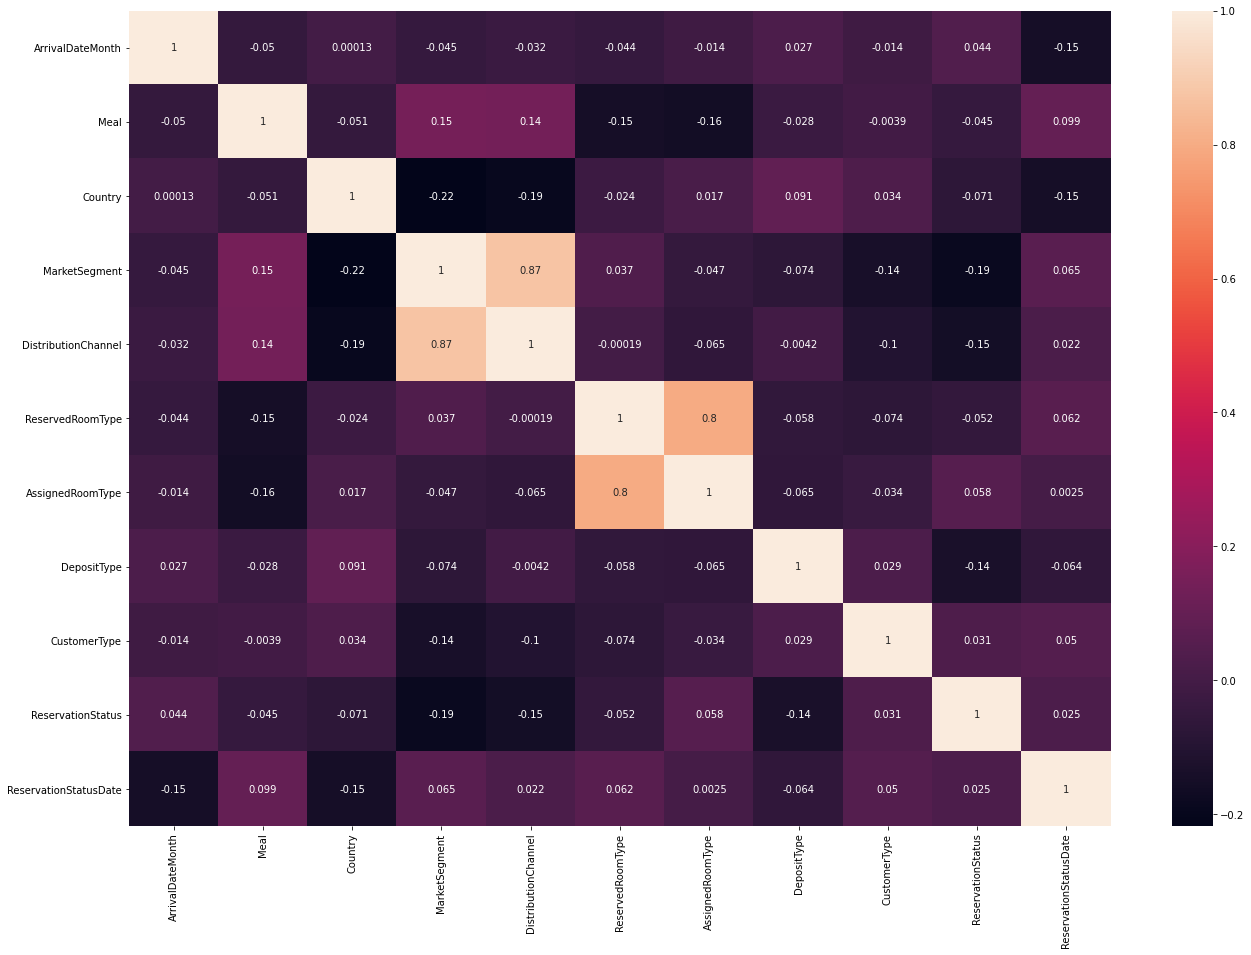

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

Separación variables train y test, Modelo de machine learning (decision tree) y evaluación del modelo.

In [95]:
def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)
    
    return x_train, x_test, y_train, y_test



x_train, x_test, y_train, y_test = data_split(df_subset, 'MarketSegment')

def train(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    
    return clf


clf = train(x_train, y_train)

def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(clf,x_train,y_train,x_train,y_train)

Training Accuracy of our model is: 0.9661585877542301
Test Accuracy of our model is: 0.9661585877542301


Graficar

[Text(128.12154450800182, 215.2656, 'X[3] <= 1.5\ngini = 0.602\nsamples = 65541\nvalue = [177, 515, 3116, 8855, 3700, 10478, 38698, 2]'),
 Text(26.54939614276048, 210.9168, 'X[3] <= 0.5\ngini = 0.531\nsamples = 13507\nvalue = [170, 458, 3004, 8680, 994, 81, 120, 0]'),
 Text(9.773334410864821, 206.56799999999998, 'X[2] <= 134.5\ngini = 0.399\nsamples = 3796\nvalue = [170, 63, 2892, 68, 504, 72, 27, 0]'),
 Text(3.4334716406727903, 202.2192, 'X[2] <= 58.5\ngini = 0.608\nsamples = 1123\nvalue = [100, 3, 600, 23, 349, 35, 13, 0]'),
 Text(1.6680491077991113, 197.8704, 'X[2] <= 44.5\ngini = 0.479\nsamples = 648\nvalue = [59, 3, 453, 10, 97, 19, 7, 0]'),
 Text(0.8700103849053741, 193.5216, 'X[9] <= 580.0\ngini = 0.652\nsamples = 237\nvalue = [36, 1, 119, 3, 63, 10, 5, 0]'),
 Text(0.3598583100581839, 189.1728, 'X[9] <= 392.0\ngini = 0.436\nsamples = 121\nvalue = [5, 0, 89, 0, 14, 10, 3, 0]'),
 Text(0.16934508708620422, 184.824, 'X[9] <= 238.0\ngini = 0.255\nsamples = 80\nvalue = [0, 0, 68, 0, 1

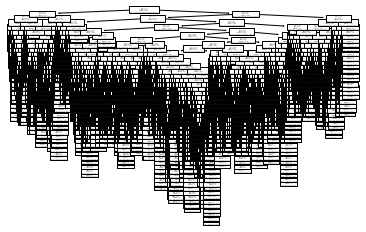

In [101]:
from sklearn import tree
tree.plot_tree(clf) 

Arbol de Decision Regresión



Conversión de columnas categóricas a numéricas

In [96]:
dff = df3.copy()
def transform(dataframe):
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    
    categorical_features = list(dataframe.columns[dataframe.dtypes == object])
    
    return dataframe[categorical_features].apply(lambda x: le.fit_transform(x))

dff = transform(dff)
dff

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,CustomerType,ReservationStatus,ReservationStatusDate
1,5,0,136,3,1,2,2,0,2,1,121
2,5,0,136,3,1,2,2,0,2,1,121
3,5,0,60,3,1,0,2,0,2,1,122
4,5,0,60,2,0,0,0,0,2,1,122
5,5,0,60,6,3,0,0,0,2,1,123
...,...,...,...,...,...,...,...,...,...,...,...
119386,1,0,15,5,3,0,0,0,2,1,919
119387,1,0,57,6,3,4,4,0,2,1,920
119388,1,0,43,6,3,3,3,0,2,1,920
119389,1,0,60,6,3,0,0,0,2,1,920


In [97]:
df_subset = dff.copy()
df_subset

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,CustomerType,ReservationStatus,ReservationStatusDate
1,5,0,136,3,1,2,2,0,2,1,121
2,5,0,136,3,1,2,2,0,2,1,121
3,5,0,60,3,1,0,2,0,2,1,122
4,5,0,60,2,0,0,0,0,2,1,122
5,5,0,60,6,3,0,0,0,2,1,123
...,...,...,...,...,...,...,...,...,...,...,...
119386,1,0,15,5,3,0,0,0,2,1,919
119387,1,0,57,6,3,4,4,0,2,1,920
119388,1,0,43,6,3,3,3,0,2,1,920
119389,1,0,60,6,3,0,0,0,2,1,920


Correlación de las columnas

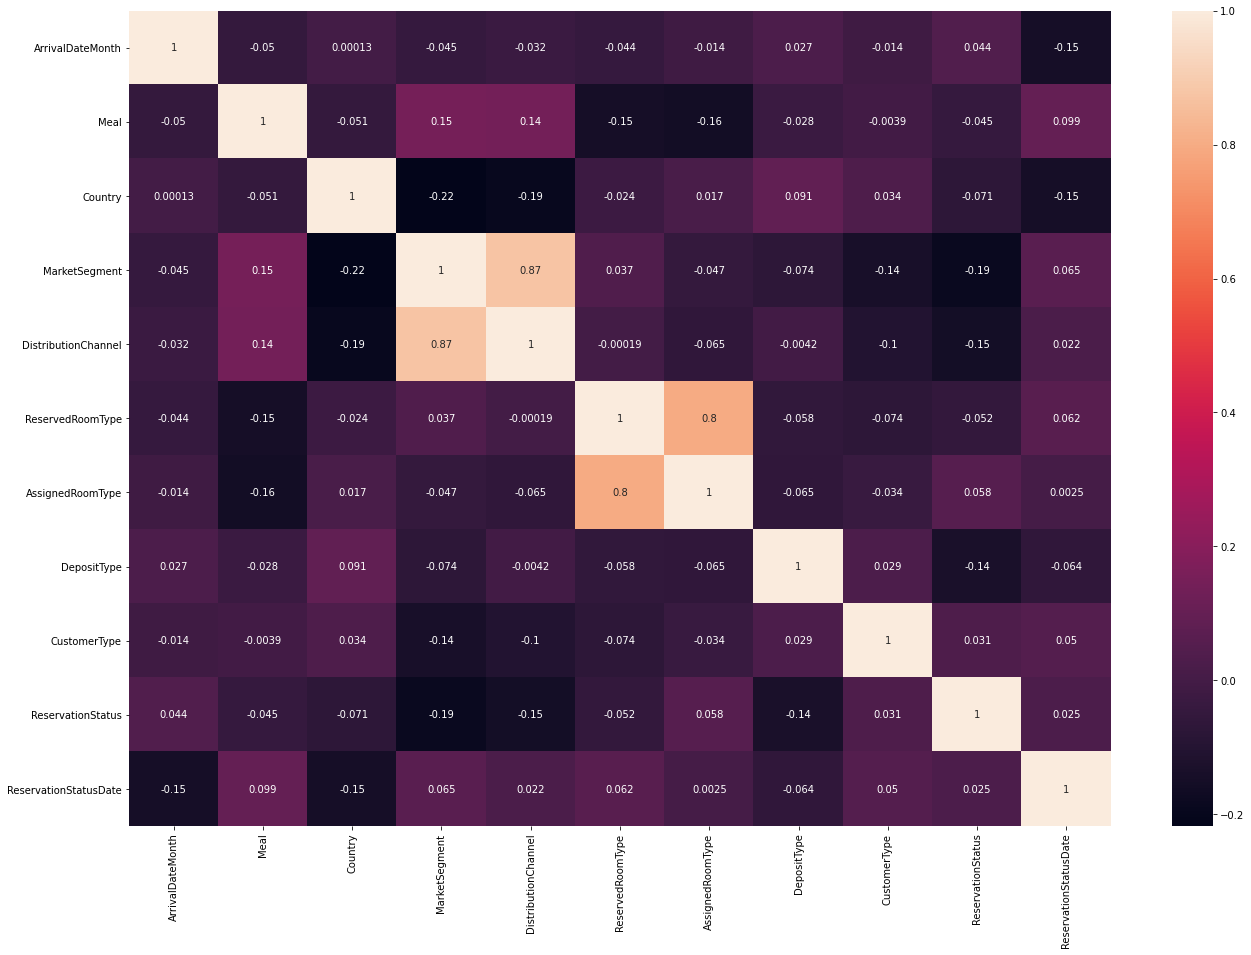

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

Separación variables train y test, Modelo de machine learning (decision tree) y evaluación del modelo.

In [99]:
def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)
    
    return x_train, x_test, y_train, y_test



x_train, x_test, y_train, y_test = data_split(df_subset, 'MarketSegment')

def train(x_train, y_train):
    from sklearn.tree import DecisionTreeRegressor

    regr_1 = DecisionTreeRegressor(max_depth=2)
    regr_1.fit(x_train, y_train)    
    
    return regr_1


regr = train(x_train, y_train)

def Score(regr,x_train,y_train,x_test,y_test):
    train_score = regr.score(x_train,y_train)
    test_score = regr.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(regr,x_train,y_train,x_test,y_test)

Training Accuracy of our model is: 0.8023473688902119
Test Accuracy of our model is: 0.8053134206082162


Naive Bayes

Asignación variables X e Y, separación variables train y test, aplicación de algoritmo "Gaussian Naive Bayes", muestra de resultado.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = df_subset.drop('MarketSegment', axis=1)
Y = df_subset['MarketSegment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Número de puntos mal etiquetados de un total de %d puntos: %d"% (X_test.shape[0], (y_test != y_pred).sum()))


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Número de puntos mal etiquetados de un total de 21847 puntos: 473200918
